In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext ipycache
%autoreload 2
import numpy as np
from scipy import stats

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import data

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

/home/pawel/tensorflow/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/pawel/tensorflow/lib/python3.5/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


In [23]:
# %%cache data.pkl data
data = pdr.get_data_yahoo(["DIA"], start="2011-01-03", end="2015-04-14")

[*********************100%***********************]  1 of 1 downloaded


In [25]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,116.410004,116.860001,116.360001,116.410004,97.411774,9108900
2011-01-04,116.709999,116.730003,116.110001,116.639999,97.604279,9775600
2011-01-05,116.459999,117.190002,116.300003,117.040001,97.938972,7567800
2011-01-06,117.139999,117.190002,116.500000,116.779999,97.721420,7161600
2011-01-07,116.910004,117.099998,115.820000,116.570000,97.545609,9249800


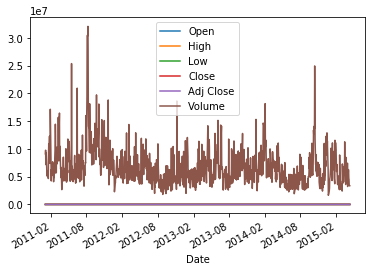

In [24]:
data.plot();

In [4]:
# ret = np.log(data / data.shift()).dropna()
ret = ((data - data.shift())/data.shift()).dropna()
ret.describe()
ret.kurtosis()
ret.corr()

,DIA,QQQ,SPY
count,1074.000000,1074.000000,1074.000000
mean,0.000443,0.000674,0.000510
std,0.008860,0.010522,0.009592
min,-0.054092,-0.060190,-0.065123
25%,-0.003603,-0.004325,-0.003744
50%,0.000612,0.001010,0.000675
75%,0.005225,0.006535,0.005389
max,0.040066,0.048231,0.046499


DIA    4.179970
QQQ    3.047026
SPY    4.948964
dtype: float64

,DIA,QQQ,SPY
DIA,1.000000,0.871867,0.971899
QQQ,0.871867,1.000000,0.926436
SPY,0.971899,0.926436,1.000000


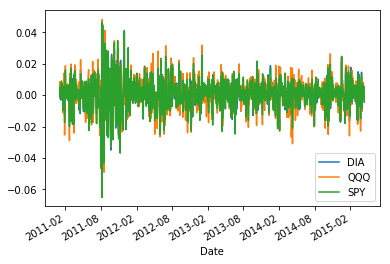

In [5]:
ret.plot();

In [63]:
# stats.normaltest(ret['SPY'])
# # stats.normaltest(ret['DIA'])
# # stats.normaltest(ret['QQQ'])

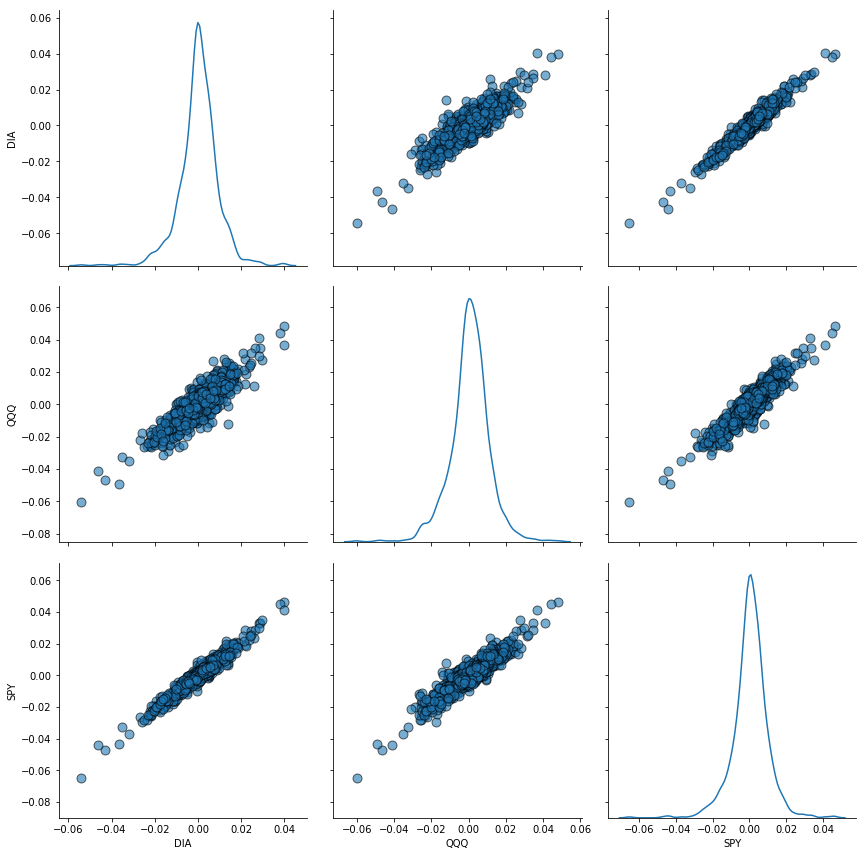

In [6]:
import seaborn as sns
sns.pairplot(ret,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

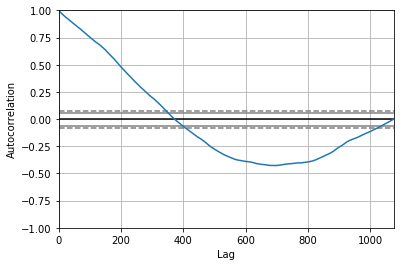

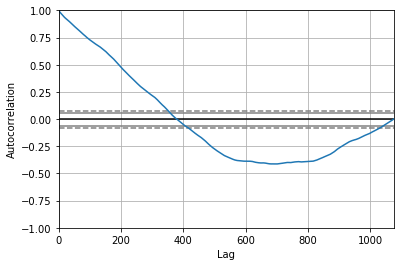

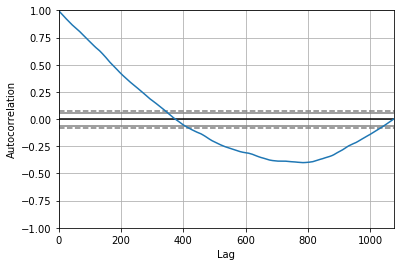

In [14]:
autocorrelation_plot(data["SPY"]);
plt.figure()
autocorrelation_plot(data["DIA"]);
plt.figure()
autocorrelation_plot(data["QQQ"]);

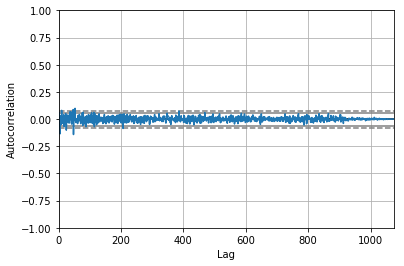

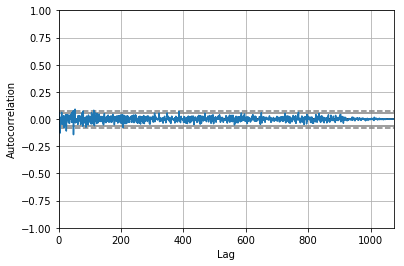

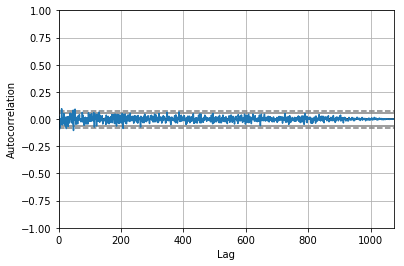

In [15]:
autocorrelation_plot(ret["SPY"]);
plt.figure()
autocorrelation_plot(ret["DIA"]);
plt.figure()
autocorrelation_plot(ret["QQQ"]);

generated and saved data: TrendingSinusoid.npz


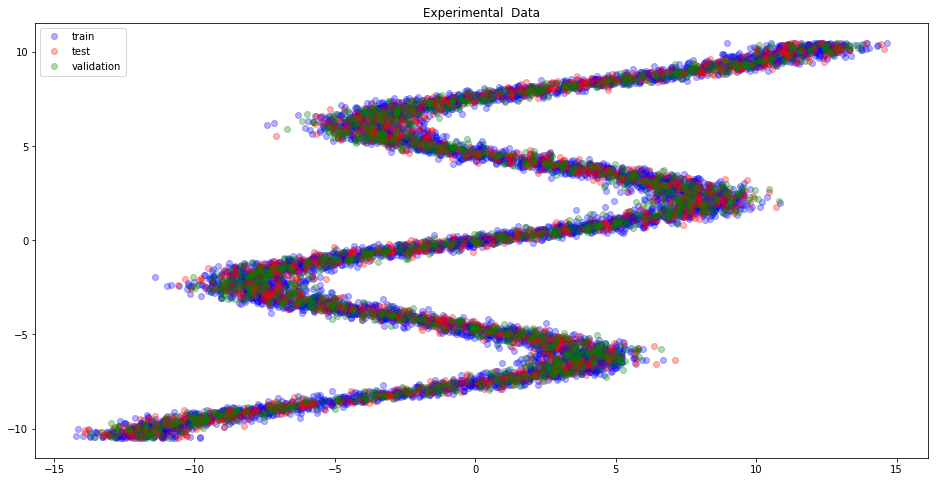

In [3]:
data_loader = data.TrendingSinusoid(data.Config('data'))
data_loader.load_data()
data_loader.plot_data()

generated and saved data: TrendingSinusoid_noise_standard_t_df_2.npz


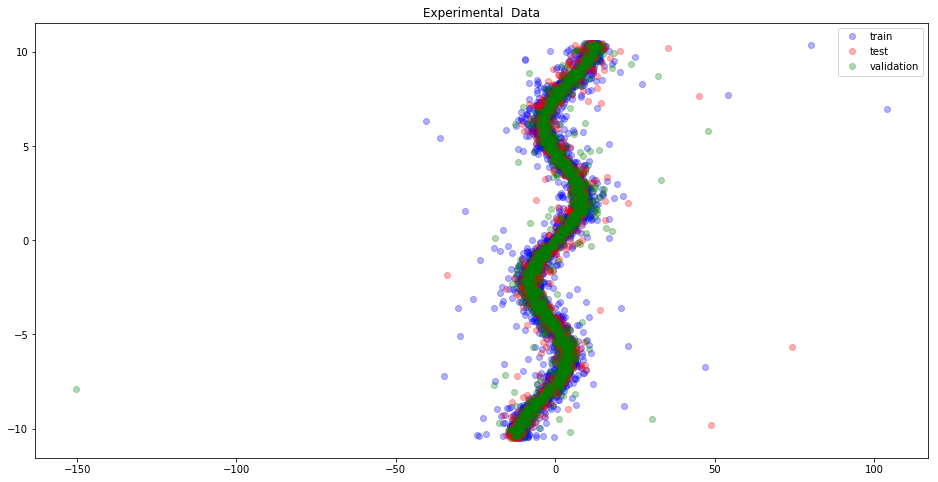

In [3]:
data_loader = data.TrendingSinusoid(data.Config('data').add_param("noise","standard_t").add_param("df",2))
data_loader.load_data()
data_loader.plot_data()

In [4]:
data_loader.min_x

array([-150.4309], dtype=float32)